
## Importing the Dependencies

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Loading the data

In [86]:
df = pd.read_csv('../data/benin-malanville.csv', parse_dates=True, index_col=0)
df.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## Summary Statistics & Missing-Value Report

In [87]:
# Summary statistics for numeric columns
summary_stats = df.describe()
summary_stats


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [88]:
# Count missing (NaN) values
missing_values = df.isna().sum().sort_values(ascending=False)
missing_values


Comments         525600
GHI                   0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

In [89]:
# Calculate percentage of missing values
missing_percent = (df.isna().sum() / len(df)) * 100
missing_report = pd.DataFrame({
    'missing_count': df.isna().sum(),
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)

missing_report


,missing_count,missing_percent
Comments,525600,100.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0
Tamb,0,0.0


In [90]:
# Columns with more than 5% missing data
high_missing = missing_report[missing_report['missing_percent'] > 5]
high_missing

,missing_count,missing_percent
Comments,525600,100.0


## Cleaning & Outlier Handling Steps

In [91]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df[key_cols].isna().sum()


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

In [92]:
# Compute Z-scores and convert to a DataFrame (important!)
z_scores = np.abs(stats.zscore(df[key_cols], nan_policy='omit'))

# Wrap the z-scores in a DataFrame with same index and columns as df
z_df = pd.DataFrame(z_scores, columns=key_cols, index=df.index)

# Create a boolean mask for outliers
outliers = z_df > 3


In [93]:
# Replace outliers with the median of each column
for col in key_cols:
    median_val = df[col].median()
    df.loc[outliers[col], col] = median_val

In [94]:
print("Outliers replaced per column:")
print(outliers.sum())


Outliers replaced per column:
GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


## Time Series Analysis


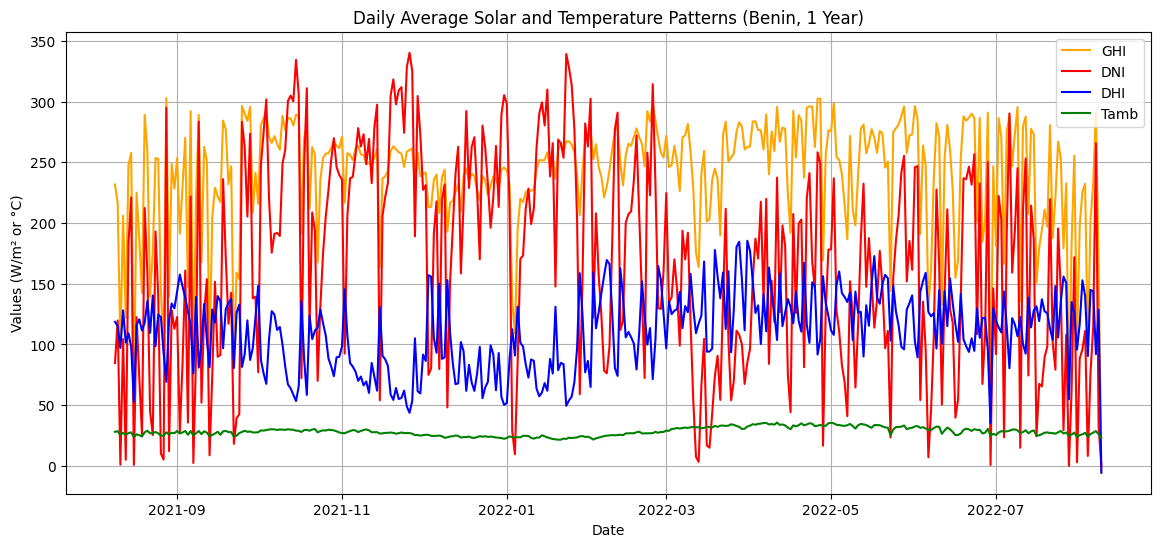

In [95]:
# Resample daily mean values
df_daily = df.resample('D').mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df_daily.index, df_daily['GHI'], label='GHI', color='orange')
plt.plot(df_daily.index, df_daily['DNI'], label='DNI', color='red')
plt.plot(df_daily.index, df_daily['DHI'], label='DHI', color='blue')
plt.plot(df_daily.index, df_daily['Tamb'], label='Tamb', color='green')

plt.title('Daily Average Solar and Temperature Patterns (Benin, 1 Year)')
plt.xlabel('Date')
plt.ylabel('Values (W/m² or °C)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4700\1616337682.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


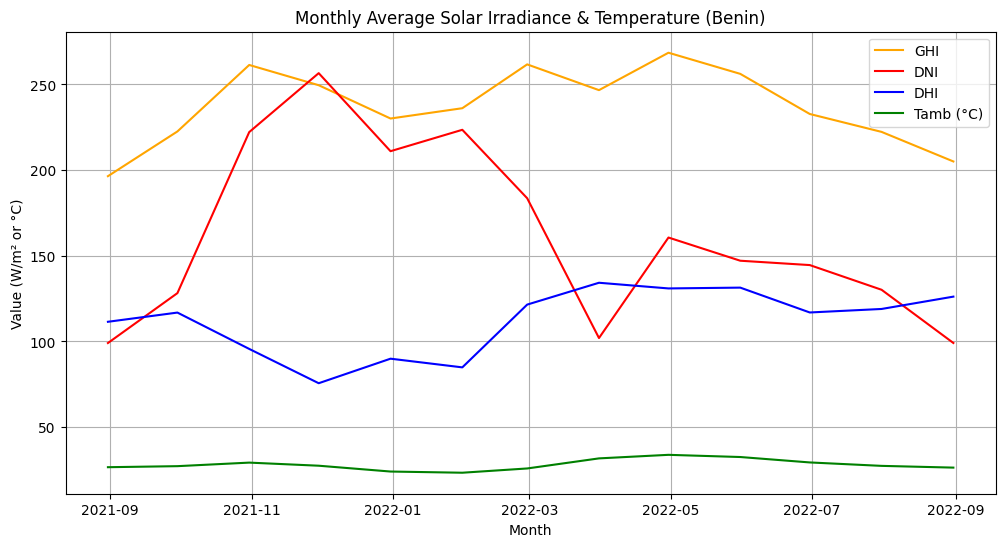

In [96]:
import matplotlib.pyplot as plt

# Compute monthly averages
df_monthly = df.resample('M').mean()

plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly['GHI'], label='GHI', color='orange')
plt.plot(df_monthly.index, df_monthly['DNI'], label='DNI', color='red')
plt.plot(df_monthly.index, df_monthly['DHI'], label='DHI', color='blue')
plt.plot(df_monthly.index, df_monthly['Tamb'], label='Tamb (°C)', color='green')

plt.title('Monthly Average Solar Irradiance & Temperature (Benin)')
plt.xlabel('Month')
plt.ylabel('Value (W/m² or °C)')
plt.legend()
plt.grid(True)
plt.show()


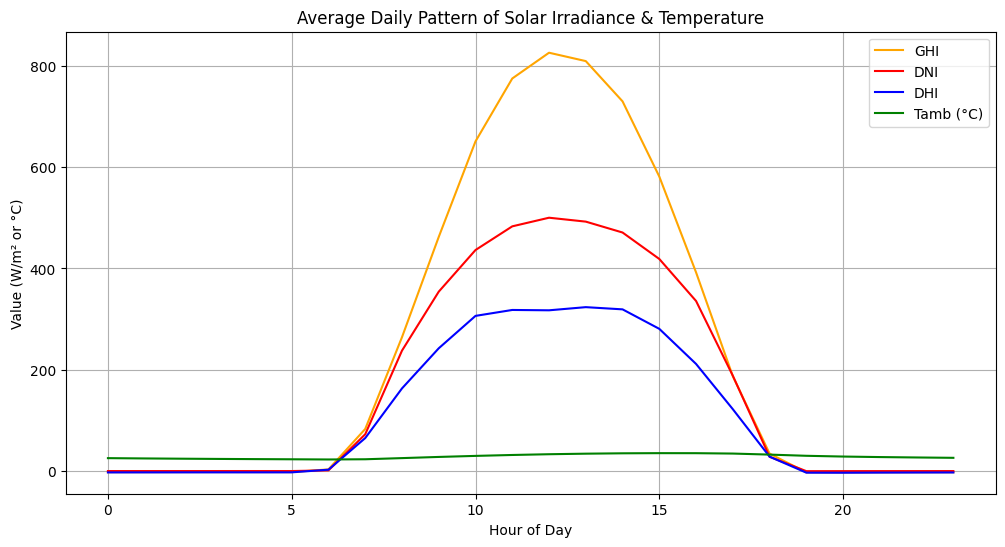

In [97]:
# Extract hour of day
df['hour'] = df.index.hour

# Group by hour and compute mean
df_hourly = df.groupby('hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(12,6))
plt.plot(df_hourly.index, df_hourly['GHI'], label='GHI', color='orange')
plt.plot(df_hourly.index, df_hourly['DNI'], label='DNI', color='red')
plt.plot(df_hourly.index, df_hourly['DHI'], label='DHI', color='blue')
plt.plot(df_hourly.index, df_hourly['Tamb'], label='Tamb (°C)', color='green')

plt.title('Average Daily Pattern of Solar Irradiance & Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Value (W/m² or °C)')
plt.legend()
plt.grid(True)
plt.show()


## Cleaning Impact

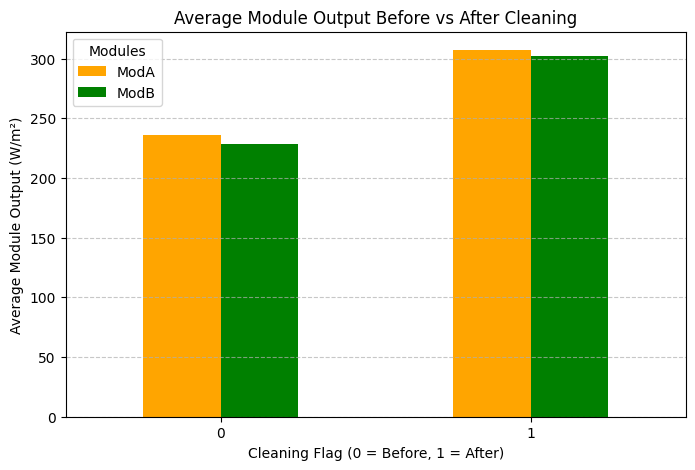

In [98]:
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()


cleaning_impact.plot(
    kind='bar',
    figsize=(8,5),
    color=['orange', 'green']
)

plt.title('Average Module Output Before vs After Cleaning')
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.ylabel('Average Module Output (W/m²)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Modules')
plt.show()



## Correlation & Relationship Analysis

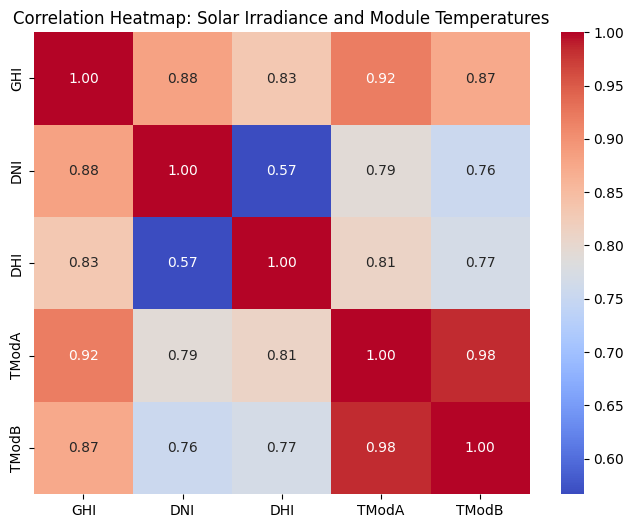

In [99]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute correlation matrix
corr = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Solar Irradiance and Module Temperatures")
plt.show()

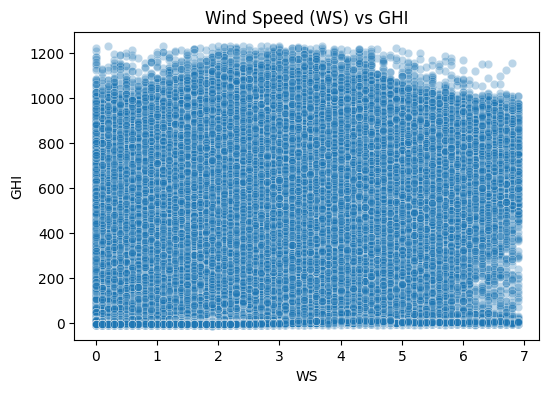

In [100]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='WS', y='GHI', alpha=0.3)
plt.title('Wind Speed (WS) vs GHI')
plt.show()


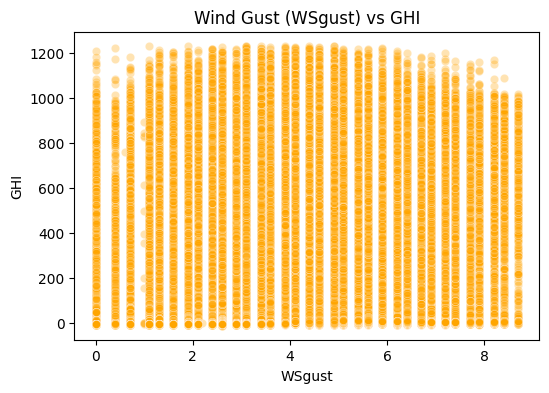

In [101]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='WSgust', y='GHI', alpha=0.3, color='orange')
plt.title('Wind Gust (WSgust) vs GHI')
plt.show()


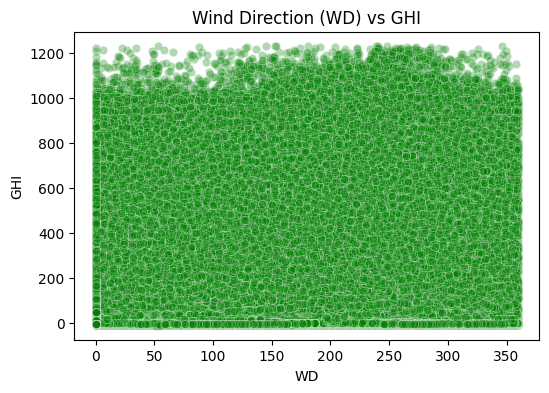

In [102]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='WD', y='GHI', alpha=0.3, color='green')
plt.title('Wind Direction (WD) vs GHI')
plt.show()


## Wind & Distribution Analysis


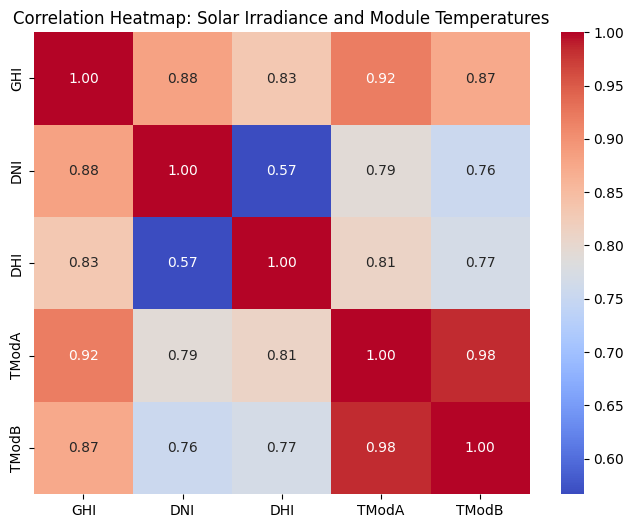

In [103]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute correlation matrix
corr = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Solar Irradiance and Module Temperatures")
plt.show()